# k-Means Clustering


El método k-Medias es un método no jerárquico basado en centroides, robusto y fácil de implementar, en donde se requiere especificar previamente el número de grupos que se van a generar y a los cuales se van a asignar los datos.

Adicionalmente, este tipo de métodos son recomendados para grandes cantidades de datos.

El algoritmo funciona de la siguiente manera: supongamos que tenemos el siguiente conjunto de datos.

![](008-01.png)

Al aplicar el algoritmo, deberemos obtener el siguiente resultado:

![](008-02.png) 

Para llegar a ello, el procedimiento que sigue el algoritmo es el siguiente:

Algoritmo k-Means

1. Seleccionar el número de k grupos (clusters)
2. Generar aleatoriamente k puntos que llamaremos centroides
3. Asignar cada elemento del conjunto de datos al centroide más cercano para formar k grupos
4. Reasignar la posición de cada centroide
5. Reasignar los elementos de datos al centroide más cercano nuevamente
   - 5.1 Si hubo elementos que se asignaron a un centroide distinto al original, regresar al paso 4, de lo contrario, el proceso ha terminado
   
   
Para entender de manera clara el algoritmo anterior, vayamos paso a paso describiéndolo gráficamente:

![](008-03.png) 

Para este conjunto de datos, digamos que k es igual a 2. (Más adelante veremos como seleccionar k).
![](008-04.png)

Los puntos azul y rojo representan los dos centroides ubicados aleatoriamente en el espacio del conjunto de datos.

![](008-05.png)

Cada elemento quedó asignado al centroide más cercano a el y de esta manera se forma los k = 2 grupos o clusters, ahora el siguiente paso:

![](008-06.png)

-

![](008-07.png)

Como se observa, hay elementos azules que ahora están más cercanos al centroide rojo y un elemento rojo del lado de la frontera del centroide azul, por lo que esos elementos serán reasignados.

__5.1 Si hubo elementos que se asignaron a un centriode distinto del original, regresamos al paso 4.__

Dado que si hubo elementos reasignados, volvemos al paso 4 y cambiamos la posición de los centroides

![](008-08.png)

Paso 5 nuevamente y reasignamos

![](008-09.png)

Regresamos al paso 4 nuevamente

![](008-10.png)

y el algoritmo continua entre el paso 4 y 5 hasta que ya no haya elementos que se tengan que reasignado de cluster

![](008-11.png)

Cuando ya no hay elementos que cambiaron de cluster, el modelo ha terminado y tenemos los dos clusters con sus respectivos elementos de la muestra de datos.

![](008-12.png)

Dado que los centroides no son parte del conjunto de datos, estos no se toman en cuenta.

![](008-13.png)

Como se puede intuir, la posición inicial de los centroides puede influir en la agrupación final de todos elementos y esto generar más de una solución para la misma cantidad de clusters

Por ejemplo, para un mismo conjunto de datos, podríamos tener dos o más agrupar los elementos de datos, dependiendo de la posición inicial de los centroides. En la siguiente imagen comparativa, tenemos k = 3 y dos opciones finales para el mismo conjunto de datos:

![](008-14.png)

___Esta ambigüedad se resuelve con una pequeña modificación al algoritmo k-Means que lo convierte en `k-Means++`___


__`Selección del número correcto de clusters k`__


Para determinar el número óptimo de clusters que se pueden tener en una muestra de datos, existen varios métodos prácticos tanto formales como gráficos que se pueden utilizar, pero una de las técnicas más comunes y robustas, es el __método del codo__.

El método del codo se basa en la suma de los cuadrados de las distancias de cada elemento de datos con su centroide correspondiente y se denota de la siguiente manera:

$$WCSS = \sum_{i\epsilon n}(X_i - Y_i)^2$$

Donde WCSS es la suma de los cuadrados de las distancias y se refiere a Within-Cluster-Sum-of-Squares, Yi es el centroide del elemento o dato Xi y n el total de datos en la muestra.

El proceso se lleva a cabo iniciando con un solo cluster para todos los elementos de la muestra y se obtiene la suma de todas las distancia de cada elemento con el centroide, posteriormente se crean dos centroides y se suman los elementos más cercanos a cada uno de los centroides para sumar las distancias de cada elemento con su centroide correspondiente. El proceso se repite para 3, 4, 5 … n centroides. Cuando el número de centroides es igual a la cantidad de datos de la muestra (n), las distancias son cero, dado que cada elemento es un centroide.

![](008-15.png)


La suma de las distancias para un centroide

![](008-16.png)


La suma de las distancias para dos centroides

![](008-17.png)



La suma de las distancias para tres centroides.


Cada uno de estos valores de WCSS para cada caso, es decir, 1 centroide, 2 centroides, etc. se grafica y obtenemos una gráfica similar a la siguiente:

![](008-18.png)

En este ejemplo se realizó el cálculo de la suma de las distancias para 1 a 10 clusters y/o centroides.

El la gráfica se observa que la suma de las distancias disminuye conforme aumenta el número de clusters y esa disminución se va atenuando conforme aumentan los número de clusters. El punto en donde se hace un codo y el cambio en el valor de la suma de las distancias se reduce significativamente, es el valor que nos indica el número óptimo de clusters que deberá tener la muestra. En este caso el punto óptimo es 3.

![](008-19.png)


Para generar la gráfica, no es necesario genera los n centroides, cuando n es el número de muestras en el conjunto de datos, un valor estimado que permita visualizar la gráfica con el codo será suficiente para determinar ese número óptimo para los clusters que generará el método k-Means.

### Ejemplo


Para este ejemplo, utilizaremos una muestra de 200 datos de una tienda que ha calificado a sus clientes con una puntuación que va de 1 a 100 de acuerdo a su frecuencia de compra y otras condiciones que ha utilizado dicha tienda para calificar a sus clientes con esa puntuación. En el conjunto de datos tenemos información sobre el género, la edad y el ingreso anual en miles del cliente. Sin embargo, para poder graficar los resultados sólo utilizaremos el ingreso anual y la puntuación para generar los grupos de clientes que existen en esta muestra y analizar dicho resultado.


In [7]:
# K-Means Clustering

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Cargar el dataset
df = pd.read_csv('../dataset/Clientes_Tienda.csv')
X = df.iloc[:, [3, 4]].values

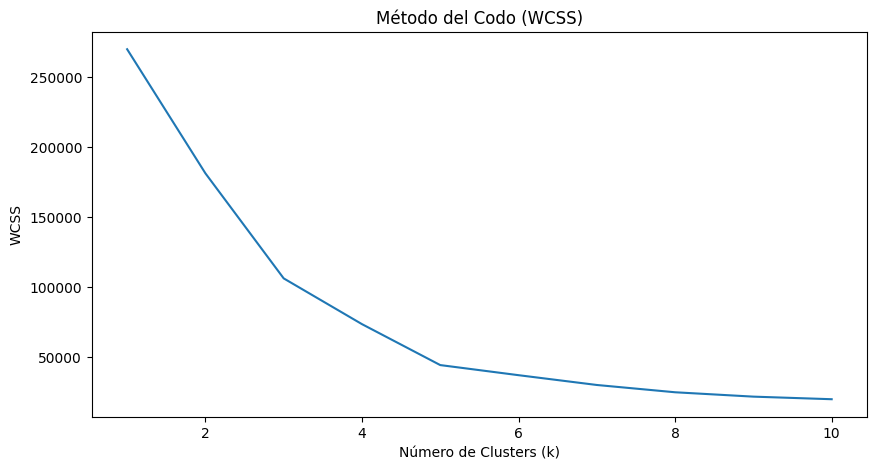

In [9]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ calcula el WCSS

# Graficar el Método del Codo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo (WCSS)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Aplicar k-Means con k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

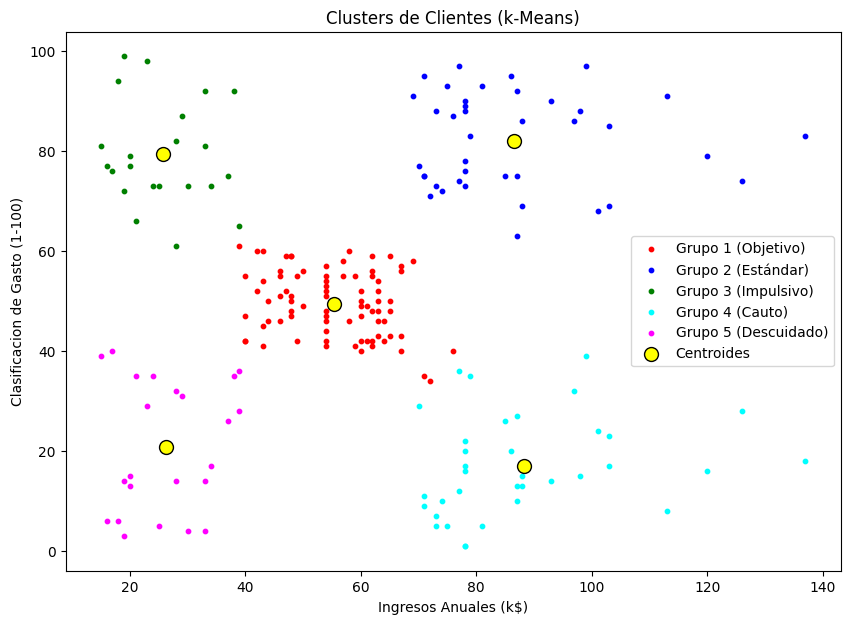

In [11]:
plt.figure(figsize=(10, 7))

# Graficar los 5 grupos
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Grupo 1 (Objetivo)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Grupo 2 (Estándar)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Grupo 3 (Impulsivo)')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Grupo 4 (Cauto)')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Grupo 5 (Descuidado)')

# Graficar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroides', edgecolors='black')

plt.title('Clusters de Clientes (k-Means)')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Clasificacion de Gasto (1-100)')
plt.legend()
plt.show()